In [35]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from matplotlib import pyplot as plt
import cv2
import numpy as np

In [39]:
img = cv2.imread(r'robot_img.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# inRange

In [40]:
r_d = widgets.IntSlider(value=0, min=0, max=255)
g_d = widgets.IntSlider(value=0, min=0, max=255)
b_d = widgets.IntSlider(value=0, min=0, max=255)
r_u = widgets.IntSlider(value=255, min=0, max=255)
g_u = widgets.IntSlider(value=255, min=0, max=255)
b_u = widgets.IntSlider(value=255, min=0, max=255)
ui = widgets.HBox([r_d, g_d, b_d, r_u, g_u, b_u])
def f(r_d, g_d, b_d, r_u, g_u, b_u):
    new_img = cv2.inRange(img, (r_d, g_d, b_d), (r_u, g_u, b_u))
    plt.imshow(new_img)
    plt.show()
    print(r_d, g_d, b_d, r_u, g_u, b_u)

out = widgets.interactive_output(f, {'r_d': r_d, 'g_d': g_d, 'b_d': b_d, 'r_u': r_u, 'g_u': g_u, 'b_u': b_u})

display(ui, out)

Output()

# Thresholding

In [29]:
img = cv2.imread(r'robot_img.png', 0)

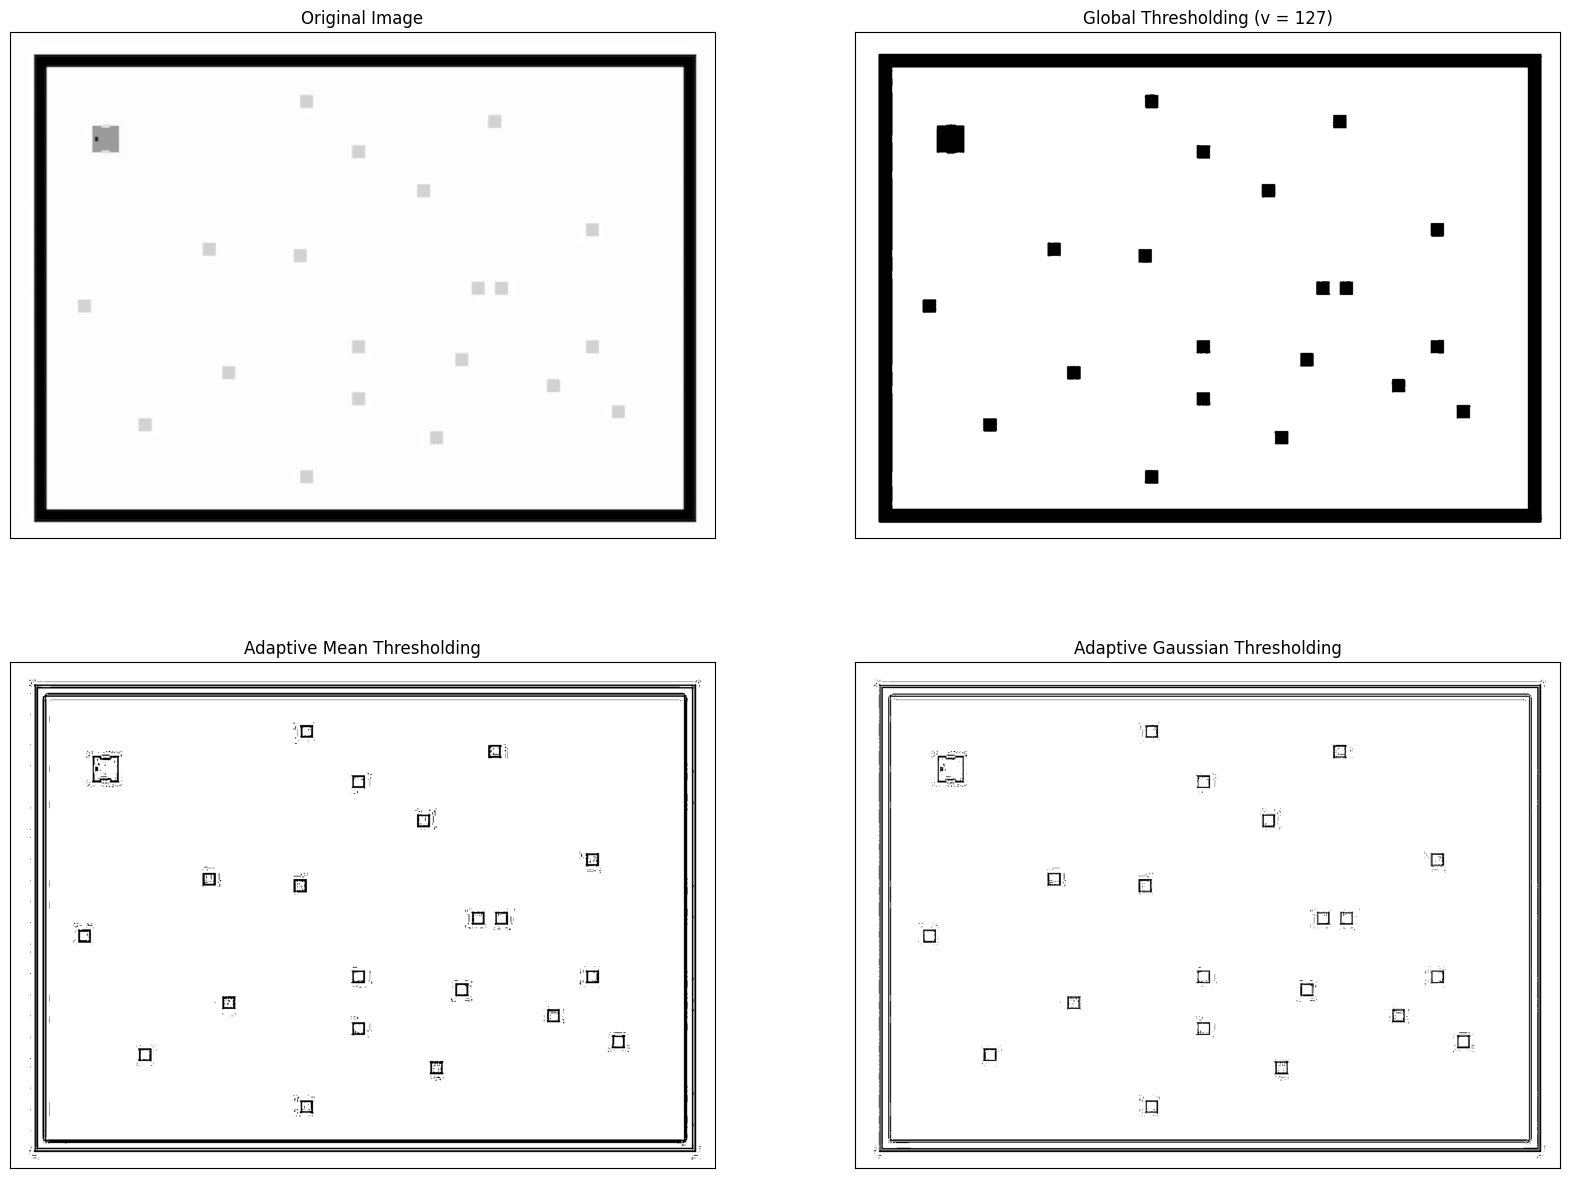

In [28]:
ret,th1 = cv2.threshold(img,240,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.rcParams["figure.figsize"] = (20, 15)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [33]:
plt.rcParams["figure.figsize"] = (10, 8)

r_d = widgets.IntSlider(value=0, min=0, max=255)
ui = widgets.HBox([r_d])
def f(r_d):
    ret,th1 = cv2.threshold(img, r_d, 255, cv2.THRESH_BINARY)
    plt.imshow(th1)
    plt.show()
    print(r_d)

out = widgets.interactive_output(f, {'r_d': r_d})

display(ui, out)

Output()

# Erode-Dilate

In [41]:
plt.rcParams["figure.figsize"] = (10, 8)

r_d = widgets.IntSlider(value=3, min=1, max=21)
g_d = widgets.IntSlider(value=3, min=1, max=21)

ui = widgets.HBox([r_d, g_d])
def f(r_d, g_d):
    erode_img = cv2.erode(img, np.ones((r_d, r_d)))  # сужение (убрать лишние пиксели)
    erode_dilate_img = cv2.dilate(erode_img, np.ones((g_d, g_d)))  # расширение (вернуть к исходному состоянию)
    plt.imshow(erode_dilate_img)
    plt.show()
    print(r_d, g_d)

out = widgets.interactive_output(f, {'r_d': r_d, 'g_d': g_d})

display(ui, out)

Output()

# Edge detection

In [50]:
kernel = np.array([
  [-1, -1, -1],
  [-1, 8, -1],
  [-1, -1, -1]
])

kernel1 = np.array([
  [0, -1],
  [1, 0],
])

kernel2_vert = np.array([
  [-1, -1, -1],
  [0, 0, 0],
  [1, 1, 1]
])

kernel2_hor = np.array([
  [-1, 0, 1],
  [-1, 0, 1],
  [-1, 0, 1]
])

kernel3_hor = np.array([
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 0, 1]
])

kernels = [kernel, kernel1, kernel2_vert, kernel2_hor, kernel3_hor]

In [51]:
img_gray = cv2.imread(r'robot_img.png', 0)

@interact(kernel=[0, 1, 2, 3, 4])
def g(kernel):
    plt.imshow(cv2.filter2D(img_gray, -1, kernels[kernel]))

interactive(children=(Dropdown(description='kernel', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_classe…